In [168]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
yelp = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)

In [170]:
imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [171]:
combo = [amazon, yelp, imdb]
reviews = pd.concat(combo)
reviews.columns = ['review', 'pos_neg']

In [172]:
reviews.head()

,review,pos_neg
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [173]:
keywords = ['awesome', 'amazing', 'incredible', 'powerful', 'moving', 'masterpiece', 'best', 'masterful', 'stylish', 'perfect']

for key in keywords:
    reviews[str(key)] = reviews.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
#creates new column for each keyword and a boolean search in column message for that keyword with spaces

In [174]:
reviews['pos_neg'] = (reviews['pos_neg'] == 1)

In [175]:
reviews['pos_neg'].head(10)

0    False
1     True
2     True
3    False
4     True
5    False
6    False
7     True
8    False
9    False
Name: pos_neg, dtype: bool

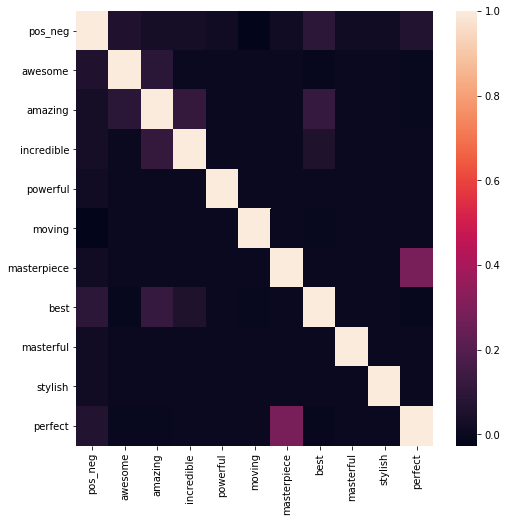

In [176]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(reviews.corr())

In [177]:
reviews.corr()
#Not bad. Only Masterpiece and Perfect have a moderate correlation. Best is lightly correlated with a few, but no big deal.

,pos_neg,awesome,amazing,incredible,powerful,moving,masterpiece,best,masterful,stylish,perfect
pos_neg,1.000000,0.059909,0.032536,0.030778,0.018914,-0.027224,0.018914,0.095304,0.018914,0.018914,0.065651
awesome,0.059909,1.000000,0.087652,-0.002827,-0.001153,-0.001631,-0.001153,-0.007885,-0.001153,-0.001153,-0.004002
amazing,0.032536,0.087652,1.000000,0.115140,-0.001264,-0.001787,-0.001264,0.120412,-0.001264,-0.001264,-0.004386
incredible,0.030778,-0.002827,0.115140,1.000000,-0.000893,-0.001262,-0.000893,0.054666,-0.000893,-0.000893,-0.003098
powerful,0.018914,-0.001153,-0.001264,-0.000893,1.000000,-0.000515,-0.000364,-0.002489,-0.000364,-0.000364,-0.001264
moving,-0.027224,-0.001631,-0.001787,-0.001262,-0.000515,1.000000,-0.000515,-0.003521,-0.000515,-0.000515,-0.001787
masterpiece,0.018914,-0.001153,-0.001264,-0.000893,-0.000364,-0.000515,1.000000,-0.002489,-0.000364,-0.000364,0.288097
best,0.095304,-0.007885,0.120412,0.054666,-0.002489,-0.003521,-0.002489,1.000000,-0.002489,-0.002489,-0.008641
masterful,0.018914,-0.001153,-0.001264,-0.000893,-0.000364,-0.000515,-0.000364,-0.002489,1.000000,-0.000364,-0.001264
stylish,0.018914,-0.001153,-0.001264,-0.000893,-0.000364,-0.000515,-0.000364,-0.002489,-0.000364,1.000000,-0.001264


In [178]:
data = reviews[keywords]
target = reviews['pos_neg']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

# Fit our model to the data. It takes just an x and y to create a map
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
#summing the quantity of True outputs from the comparison

Number of mislabeled points out of a total 2748 points : 1316


Oof. This isn't very good. I should try adding a few more keywords for positive reviews and remove a couple that might be present in even a bad review. "Best" could be present in either good or bad. "Stylish" could as well to describe a film that has style but not substance (Looking at you, Sucker Punch). 

In [179]:
keywords = ['100%', 'great', 'Academy', 'recommend', 'awesome', 'amazing', 'incredible', 'powerful', 'moving', 'masterpiece', 'entertaining', 'masterful', 'the best', 'A+', 'brilliant', 'enjoyed', 'fantastic', 'perfect', 'loved', 'underrated', 'refreshing']

for key in keywords:
    reviews[str(key)] = reviews.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

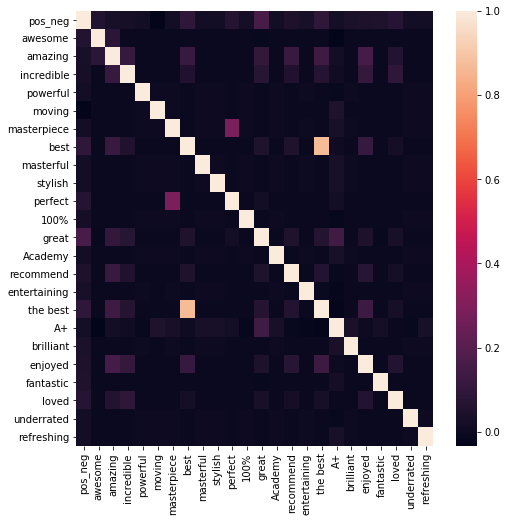

In [180]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(reviews.corr())

In [181]:
reviews.corr()

,pos_neg,awesome,amazing,incredible,powerful,moving,masterpiece,best,masterful,stylish,...,recommend,entertaining,the best,A+,brilliant,enjoyed,fantastic,loved,underrated,refreshing
pos_neg,1.000000,0.059909,0.032536,0.030778,0.018914,-0.027224,0.018914,0.095304,0.018914,0.018914,...,0.044246,0.032772,0.093122,0.019367,0.042323,0.047130,0.050096,0.071471,0.018914,0.018914
awesome,0.059909,1.000000,0.087652,-0.002827,-0.001153,-0.001631,-0.001153,-0.007885,-0.001153,-0.001153,...,-0.007885,-0.001998,-0.006864,-0.033164,-0.002580,-0.004167,-0.003054,-0.004907,-0.001153,-0.001153
amazing,0.032536,0.087652,1.000000,0.115140,-0.001264,-0.001787,-0.001264,0.120412,-0.001264,-0.001264,...,0.120412,-0.002189,0.140127,0.016000,-0.002828,0.156294,-0.003347,0.063037,-0.001264,-0.001264
incredible,0.030778,-0.002827,0.115140,1.000000,-0.000893,-0.001262,-0.000893,0.054666,-0.000893,-0.000893,...,0.054666,-0.001546,0.064213,0.011301,-0.001997,0.110396,-0.002364,0.092849,-0.000893,-0.000893
powerful,0.018914,-0.001153,-0.001264,-0.000893,1.000000,-0.000515,-0.000364,-0.002489,-0.000364,-0.000364,...,-0.002489,-0.000631,-0.002167,-0.010470,-0.000815,-0.001315,-0.000964,-0.001549,-0.000364,-0.000364
moving,-0.027224,-0.001631,-0.001787,-0.001262,-0.000515,1.000000,-0.000515,-0.003521,-0.000515,-0.000515,...,-0.003521,-0.000892,-0.003065,0.049179,-0.001152,-0.001861,-0.001364,-0.002191,-0.000515,-0.000515
masterpiece,0.018914,-0.001153,-0.001264,-0.000893,-0.000364,-0.000515,1.000000,-0.002489,-0.000364,-0.000364,...,-0.002489,-0.000631,-0.002167,0.034769,-0.000815,-0.001315,-0.000964,-0.001549,-0.000364,-0.000364
best,0.095304,-0.007885,0.120412,0.054666,-0.002489,-0.003521,-0.002489,1.000000,-0.002489,-0.002489,...,0.049303,-0.004313,0.870508,0.009104,-0.005571,0.115017,-0.006594,0.024568,-0.002489,-0.002489
masterful,0.018914,-0.001153,-0.001264,-0.000893,-0.000364,-0.000515,-0.000364,-0.002489,1.000000,-0.000364,...,-0.002489,-0.000631,-0.002167,0.034769,-0.000815,-0.001315,-0.000964,-0.001549,-0.000364,-0.000364
stylish,0.018914,-0.001153,-0.001264,-0.000893,-0.000364,-0.000515,-0.000364,-0.002489,-0.000364,1.000000,...,-0.002489,-0.000631,-0.002167,0.034769,-0.000815,-0.001315,-0.000964,-0.001549,-0.000364,-0.000364


In [182]:
#Let's try again

data = reviews[keywords]
target = reviews['pos_neg']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 2748 points : 1180


Well this is better, but still not great. Let's try running this on each of the individual dataframes to see where we're encountering mismatches. 

In [183]:
amazon.columns = ['review', 'pos_neg']
yelp.columns = ['review', 'pos_neg']
imdb.columns = ['review', 'pos_neg']
amazon['pos_neg'] = (amazon['pos_neg'] == 1)
yelp['pos_neg'] = (yelp['pos_neg'] == 1)
imdb['pos_neg'] = (imdb['pos_neg'] == 1)

In [184]:
keywords = ['100%', 'great', 'Academy', 'recommend', 'awesome', 'amazing', 'incredible', 'powerful', 'moving', 'masterpiece', 'entertaining', 'masterful', 'the best', 'A+', 'brilliant', 'enjoyed', 'fantastic', 'perfect', 'loved', 'underrated', 'refreshing']

for key in keywords:
    amazon[str(key)] = amazon.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

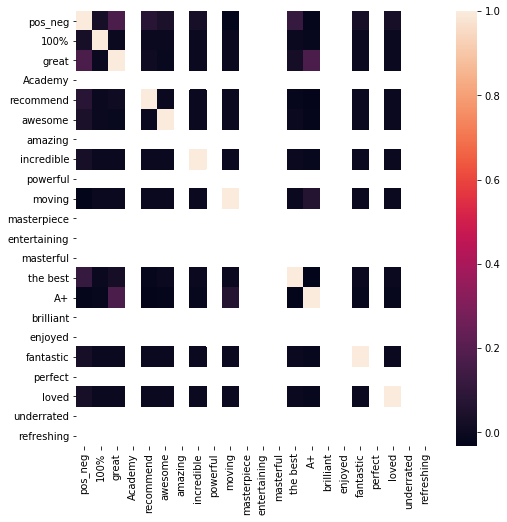

In [185]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(amazon.corr())

Lots of mismatched keywords here. But the ones that do match do show virtually zero correlation. Let's continue. 

In [186]:
data = amazon[keywords]
target = amazon['pos_neg']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 440


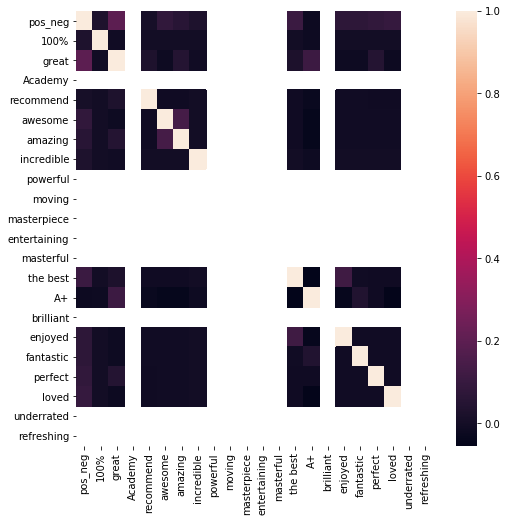

In [187]:
for key in keywords:
    yelp[str(key)] = yelp.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(yelp.corr())

In [188]:
data = yelp[keywords]
target = yelp['pos_neg']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 415


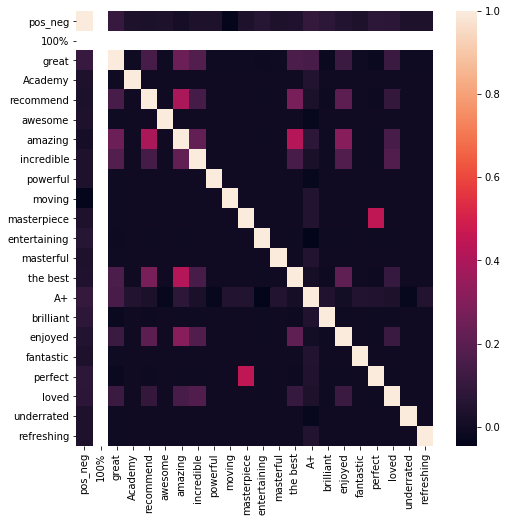

In [189]:
for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(imdb.corr())

In [190]:
data = imdb[keywords]
target = imdb['pos_neg']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 305


Amazon - Number of mislabeled points out of a total 1000 points : 440 (44%)
Yelp - Number of mislabeled points out of a total 1000 points : 415 (41%)
IMDB - Number of mislabeled points out of a total 748 points : 305 (41%)

All three of these seem to be similarly inefficient. Which means that no one is skewing the Bernoulli Naive Bayes. And this is good because it means that I can simply make the combined DataFrame 'Reviews' more efficient a predictor and each of the three will follow. 

The problem is not the violation of the assumption of independence as most of the keywords showed little to no correlation with any other. So perhaps the keywords are not as effective as one would thing at classifying positive reviews. So perhaps the better approach is to assemble a list of keywords that might classify negative reviews instead. 

In [191]:
keywords = ['awful', 'terrible', 'boring', 'trite', 'stupid', 'bland', 'worst', 'stupid', 'hated', 'waste', 'mediocre', 'derivative', 'fails', 'weak', 'inept', 'lacking', 'misstep', 'poorly', 'lazy', 'failure', 'garbage']

for key in keywords:
    reviews[str(key)] = reviews.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

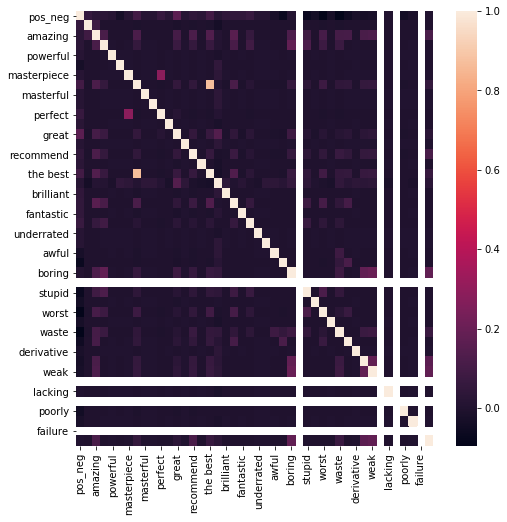

In [192]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(reviews.corr())

In [193]:
data = reviews[keywords]
target = reviews['pos_neg']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 2748 points : 1268


Though just a first attempt at going the other direction, this is no better than our positive classifier. 

EUREKA AND THREE CHEERS FOR THE IDIOT!

It seems that I started with the assumption, likely because of IMDB as one of the three datasets being exclusive to entertainment, that all three were batches of reviews for movies. Amazon is also a massive provider of entertainment, so that made sense. Not sure why I didn't realize that Yelp being present was a red flag that each of these are meant as entirely separate training sets. 

However, by breakinng the positive movie sentiment model down by dataset I still came up with a poor outcome. At least let me try the negative sentiment for IMDB before trying to perform a Bernoulli NB on the amazon dataset as a product review training dataset. 

In [194]:
keywords = ['awful', 'terrible', 'boring', 'trite', 'stupid', 'bland', 'worst', 'stupid', 'hated', 'waste', 'mediocre', 'derivative', 'fails', 'weak', 'inept', 'lacking', 'misstep', 'poorly', 'lazy', 'failure', 'garbage']

for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

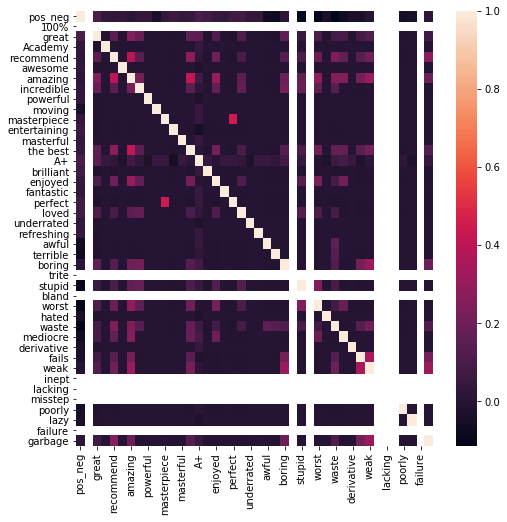

In [195]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(imdb.corr())

In [196]:
data = imdb[keywords]
target = imdb['pos_neg']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 324


Still no better with an efficiency of 43%, when I was shooting for something around 15-20%. But several of the keywords are not present and a lot of them have a higher correlation than I would like. Let's retool the keyword list

In [197]:
keywords = ['slow', 'flat', 'disappointed', 'disappointing', 'empty', 'wasted', 'horrible', 'horrendous', 'predictable', 'boring', 'weak', 'slow', 'disappointment', 'awful', 'flawed', 'stupid', 'terrible', 'no plot', 'sucks', 'sucked', 'bad writing', 'appaling', 'lacked', 'lacking', 'bore', 'horrible', 'ridiculous', 'annoying', 'annoyed', 'cheap']

for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [198]:
data = imdb[keywords]
target = imdb['pos_neg']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 318


The results remain in unmoved at 42.5%, well below my aim. I'll have to spend more time playing with it to find how to lower the mislabled percentage. 